# **Study of sunspots data**
**Author:** Eric Dietriche , Sesso Domtchoueng




In [7]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

1)	Read the data from your individual variant into Python notebook

In [45]:
df = pd.read_csv(r"C:\Users\ericd\Documents\DDPG-for-selling-energy-renewal-1\documents\monthly-sunspots.csv")

In [46]:

df =df.rename(columns={"Month":"month" , "Sunspots":"sunspots"})
df.head(24)

,month,sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
5,1749-06,83.5
6,1749-07,94.8
7,1749-08,66.3
8,1749-09,75.9
9,1749-10,75.5


2) Output the main information (number of variables, number of instances). 

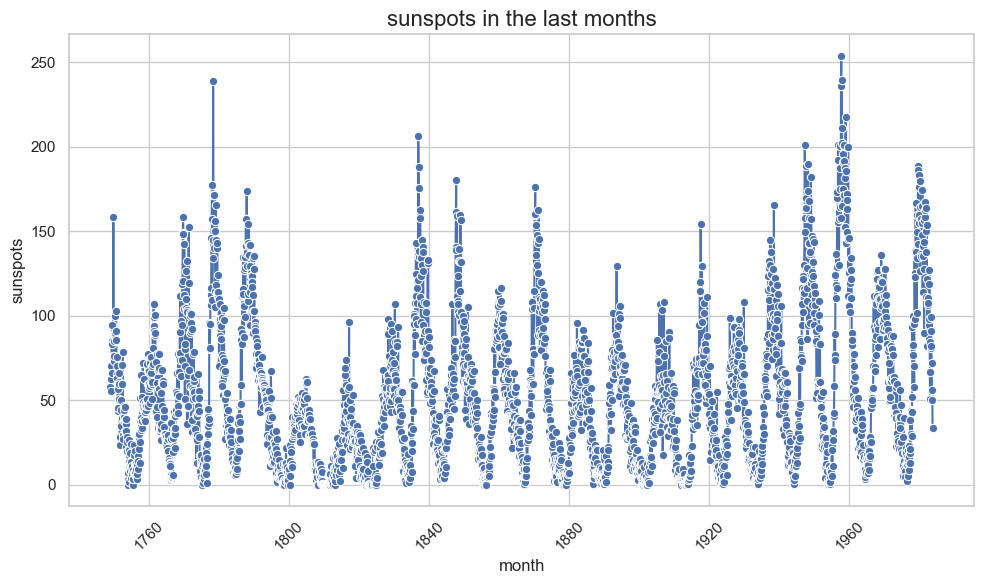

In [47]:
# Convert 'date' column to datetime
df['month'] = pd.to_datetime(df['month'], format="%Y-%m")

# Plot using Seaborn
sns.set_theme(style="whitegrid")  # Optional: Set a theme for better visuals
plt.figure(figsize=(10, 6))  # Optional: Set figure size

sns.lineplot(data=df, x="month", y="sunspots", marker="o")

# Customize the plot
plt.title("sunspots in the last months", fontsize=16)
plt.xlabel("month", fontsize=12)
plt.ylabel("sunspots", fontsize=12)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

Perform this statistical test to formally check stationarity. The null hypothesis is that the series is non-stationary.

In [49]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['sunspots'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] < 0.05:
    print("The series is stationary (reject null hypothesis).")
else:
    print("The series is non-stationary (fail to reject null hypothesis).")


ADF Statistic: -9.567667511913077
p-value: 2.3334521438662885e-16
The series is stationary (reject null hypothesis).


Compute and plot the rolling mean and standard deviation to see if they are constant over time

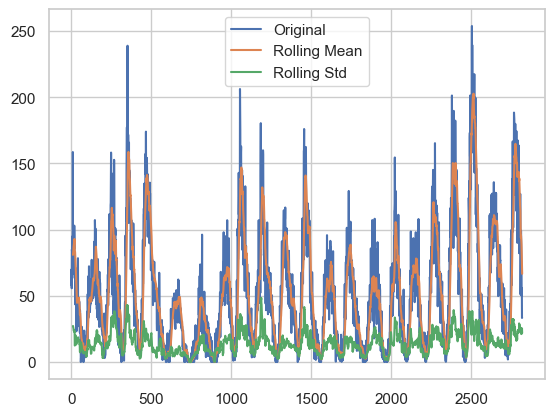

In [51]:
rolling_mean = df['sunspots'].rolling(window=12).mean()
rolling_std = df['sunspots'].rolling(window=12).std()

plt.plot(df['sunspots'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend()
plt.show()


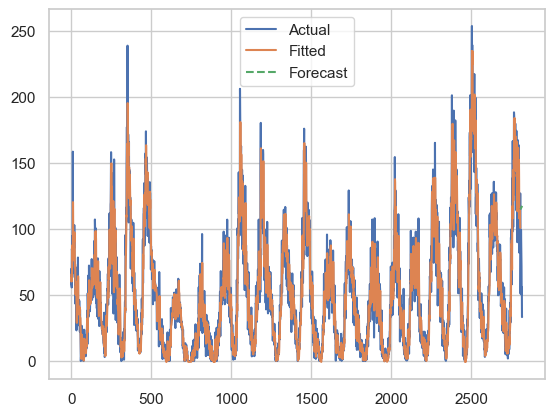

In [53]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Train-Test Split
train = df.iloc[:-12]
test = df.iloc[-12:]

# Fit ETS model
model = ExponentialSmoothing(train['sunspots'], seasonal=None, trend="additive", seasonal_periods=12)
fit = model.fit()

# Forecast
forecast = fit.forecast(len(test))

# Plot
plt.plot(df['sunspots'], label="Actual")
plt.plot(fit.fittedvalues, label="Fitted")
plt.plot(forecast, label="Forecast", linestyle="--")
plt.legend()
plt.show()


5) Look at independent and dependent variables. Divide the dataset accordingly into matrices X and Y. Output the shapes of these matrices. 

In [5]:
#Write your code here 
Y = df['Class']
X = df.drop(['Class'],axis='columns')
print('Shape of X:', X.shape)
print('Shape of Y:', Y.shape)

Shape of X: (1372, 4)
Shape of Y: (1372,)


*there are 4 dependent Variables with the totale size 5488 (1372 rows and 4 columns namely VarianceWT,	SkewnessWT,	CurtosisWT and	Image Entropy) and the independent variable Y is Class has 1372 rows and 1 column.* 

6) Look at data types of the variables. Are there any categorical variable you need to encode? Execute necessary transformations. Drop some columns if necessary, when recommended in your individual variant.

In [ ]:
#Write your code here 
X.dtypes
# there has no categorical variable. we don't have to encode the variables

VarianceWT       float64
SkewnessWT       float64
CurtosisWT       float64
Image Entropy    float64
dtype: object

7) Are there any Nan values? Try different filling of them (mean, median).

In [6]:
#fill Nan Values with the mean values , if at least one value is nan-value. 
if (not (df.isnull().values.any())):
    print("There are no NAN values")
else:
  for column in df:
    if df[column].isnull().values.any(): 
              df[column] = df[column].fillna(df[column].mean())
  Y = df['Class']
  X = df.drop(['Class'],axis='columns')

There are no NAN values


*In the first step I check if the dataframe contains a nan value. If there are nan values, I fill the nan values ​​in each column with the mean of the column containing nan values* 

8) Check the dependences between each of the independent variable and the target variable and among the independent variables.  Output correlation table and corresponding headmap results.

In [7]:
#Write your code here 
correlation = df.corr()
correlation

,VarianceWT,SkewnessWT,CurtosisWT,Image Entropy,Class
VarianceWT,1.000000,0.264026,-0.380850,0.276817,-0.724843
SkewnessWT,0.264026,1.000000,-0.786895,-0.526321,-0.444688
CurtosisWT,-0.380850,-0.786895,1.000000,0.318841,0.155883
Image Entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
Class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


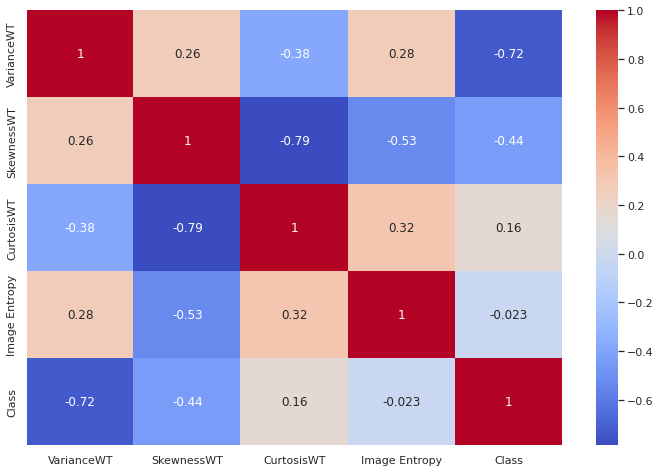

In [8]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

* Looking at the previous correlation matrix, we can see that Class shows the largest correlation with the Feature VrianceWT (-0.72).From the above Heatmap, it is seen that the Variables SkewnessWT and CurtosisWT are highly correlated (-0.79). But further we could keep SkewnessWT since its correlation with Class is higher than that of CurtosisWT.

9)` Build 2D plots of dependences between each pair of the variables`.

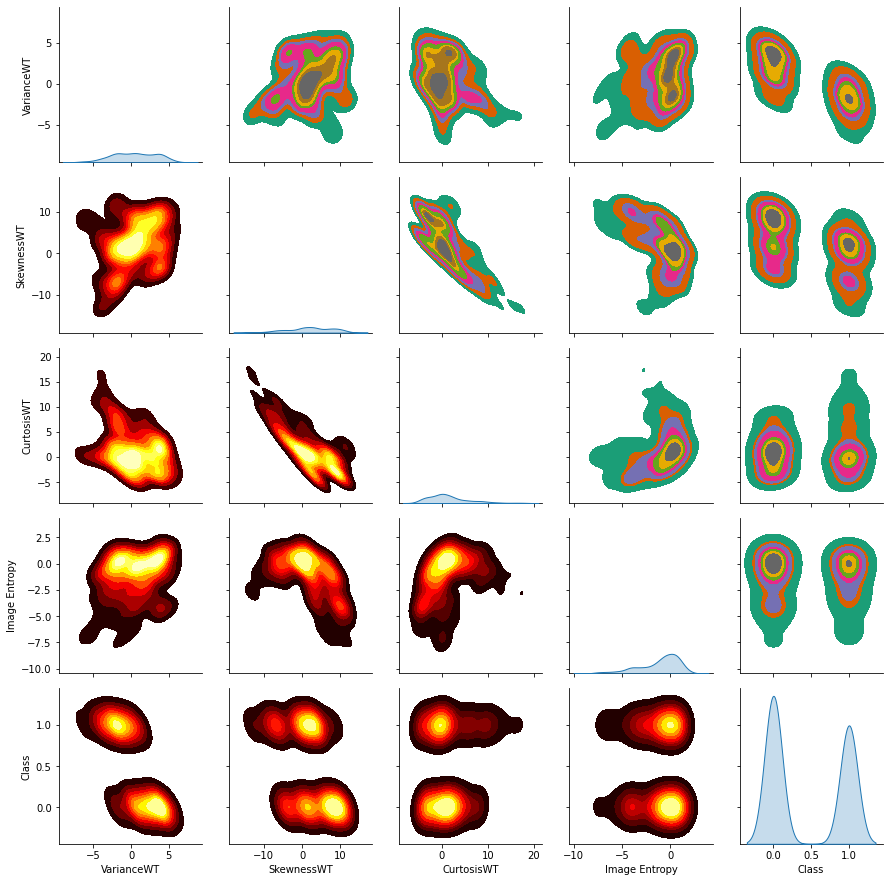

In [ ]:
g = sns.PairGrid(df)
g = g.map_upper(sns.kdeplot, cmap="Dark2",shade=True)
g = g.map_lower(sns.kdeplot, cmap="hot",shade=True)
g = g.map_diag(sns.kdeplot, shade=True)

*Comment the results of the previous program* 

# **`Task 2 “Data Analysis” (7 Scores)`**

Compare 4 ML methods: 

*   Logistic regression
*   Decision tree classification
*   KNN: k nearest neighbours classification
*   Support vector machine (SVM) classification



1) Scale your whole dataset. Try different scalings for your dataset. (Standard Scaler, MinMax Scaler). Experiment with Standard Scaler first.

In [9]:
#Write your code here. 
# transform data
standard_scaler = pd.DataFrame(
    StandardScaler().fit_transform(X),
    columns = X.columns
)


2) Divide your dataset into 2 parts: training set and testing set (90:10). Use defined random_state to reproduce the splitting for other Scaler. Output the dimension of the resulting datasets.

In [10]:
#Write your code here
X_train, X_test, y_train, y_test = train_test_split(standard_scaler,Y,train_size=0.9,random_state=1)
print('len(X_train):',len(X_train))
print('len(X_test):',len(X_test))
print('len(y_train):',len(y_train))
print('len(y_test):',len(y_test))

len(X_train): 1234
len(X_test): 138
len(y_train): 1234
len(y_test): 138


3) **Preliminary analysis:** Build 4 models based on 4 mentioned ML methods. For each model: train with training set and output the confusion matrix of the model using training set. Calculate accuracy, precision, recall, F1 metrics over training set. Is precision or recall more important for description of your data? Build the ROC_AUC curve. Test your models with a testset and output the confusion matrix. Compare the same performance metrics calculated inside one model for training and testing sets.

In [11]:
def evaluate_model(model):
    model.fit(X_train,y_train)
    y_predicted = model.predict(X_test)
    # accuracy: (TP + TN) / (TP + TN + FN + FP)
    accuracy = accuracy_score(y_test, y_predicted)
    print('Accuracy: %.3f' % accuracy)
    # calculate prediction TP /TP + FP
    precision = precision_score(y_test, y_predicted)
    print('Precision: %.3f' % precision)
    # calculate recall TP /TP + FN
    recall = recall_score(y_test, y_predicted)
    print('Recall: %.3f' % recall)
    # calculate score
    score = f1_score(y_test, y_predicted)
    print('F-Measure: %.3f' % score)
    # ROC AUC
    pred_prob = model.predict_proba(X_test)
    # roc curve for models
    fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
    # matplotlib
    plt.style.use('seaborn')
    # plot roc curves
    plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.show()
    # show the confusion Matrix
    print("confusion Matrix:")
    print(confusion_matrix(y_test, y_predicted))


**Linear logistic regression**

Accuracy: 0.978
Precision: 0.969
Recall: 0.984
F-Measure: 0.976


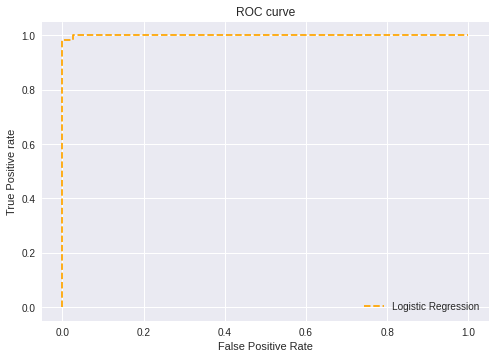

confusion Matrix:
[[73  2]
 [ 1 62]]


In [12]:
# Tain with training set
model = LogisticRegression()
evaluate_model(model)


*There are 762 True positive, target variable value 0 that were correctly classified.There are 375 True negative, target variable value 1 that were correctly classified.However the algortihm missclassified 235 target values by giving 0 instead of 1 (False negative).and the algorithm did not fail to rank the target values ​​where the actual values ​​where 0(count(False positive) ist 0 ). The metrics above tell us: 83% of data instances are correctly classified. 100% of the data instances have a positive predictive value. but the sensitivity is not very high at 61.5%, which means that the probability of evaluating a positive value is 0.615. The F1 measure is 0.761 high, meaning the precision and recall metrics are also high. This model is not bad*

**Decision tree classification**

Accuracy: 0.986
Precision: 0.969
Recall: 1.000
F-Measure: 0.984


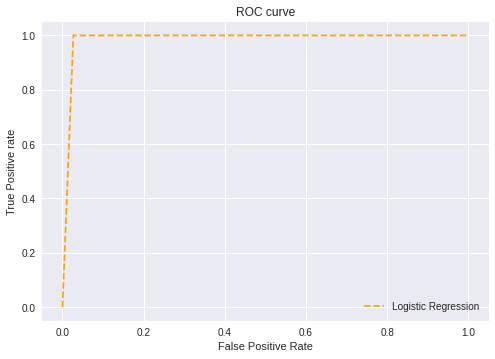

confusion Matrix:
[[73  2]
 [ 0 63]]


In [ ]:
#Write your code here 
model = tree.DecisionTreeClassifier()
evaluate_model(model)

*Comment the results of the previous program*. *Compare the results of the same characteristics for training and test sets. Make conclusions.*

**kNN: k nearest neighbours classification**

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F-Measure: 1.000


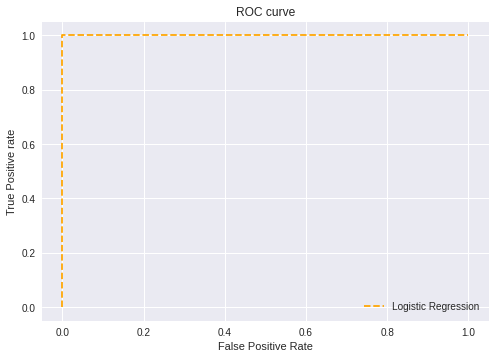

confusion Matrix:
[[75  0]
 [ 0 63]]


In [ ]:
#Write your code here 
model =  KNeighborsClassifier(n_neighbors = 1)
evaluate_model(model)

*Comment the results of the previous program*. *Compare the results of the same characteristics for training and test sets. Make conclusions.*

**Support vector machine**

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F-Measure: 1.000


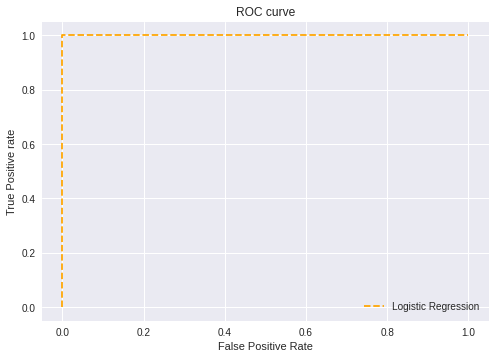

confusion Matrix:
[[75  0]
 [ 0 63]]


In [ ]:
#Write your code here
model = SVC(probability=True)
evaluate_model(model)


*Comment the results of the previous program*. *Compare the results of the same characteristics for training and test sets. Make conclusions.*

4) Re-calculate the results of Task 2 (use the same random_state as for Standard Scaler by splitting) with MinMaxScaler and compare the results based on metric accuracy. Use the Scaler, which gives the best results for the next Tasks.

In [14]:
def accuracy_metric(model,X_train, X_test, y_train, y_test ):
      model.fit(X_train,y_train)
      y_predicted = model.predict(X_test)
      accuracy = accuracy_score(y_test, y_predicted)
      print('Accuracy with',str(model),': %.3f' % accuracy)
      

In [15]:
#transform data
min_max_scaler = pd.DataFrame(
   MinMaxScaler().fit_transform(X),
    columns = X.columns
)
X_train, X_test, y_train, y_test = train_test_split(min_max_scaler,Y,test_size=0.1,random_state=1)
model = SVC(probability=True)
accuracy_metric(model,X_train, X_test, y_train, y_test )
model = KNeighborsClassifier(n_neighbors = 1)
accuracy_metric(model,X_train, X_test, y_train, y_test )
model = LogisticRegression()
accuracy_metric(model,X_train, X_test, y_train, y_test )
model = tree.DecisionTreeClassifier()
accuracy_metric(model,X_train, X_test, y_train, y_test )

Accuracy with SVC(probability=True) : 1.000
Accuracy with KNeighborsClassifier(n_neighbors=1) : 1.000
Accuracy with LogisticRegression() : 0.971
Accuracy with DecisionTreeClassifier() : 0.986


*I got the best score with the MinMasxScaler for each model*





# **`Task 3 “Cross validation” (10 Scores)`**

1)	Make 5 fold cross validation, dividing your combined (training + validation sets) into 5 folds in different combinations manually with the function train_test_split() and  without using such functions as: cross_val_score(), cross_validation(), GridSearchCV(). Execute a cycle for each fold running all four models inside.

2) Find the average values for each metric for each model based on the validation set. 

3) Try different values for the hyperparameters (see corresponding lecture slides) for each model and re-run the steps 1-2. Make conclusions about the best model and best parameters, based on each metrics and based on the majority of the metrics. 



In [16]:
import numpy as np
# list of metrics for each model
l_accuracys, l_precisions, l_recalls, l_F1metrics = list(),list(),list(),list()
svc_accuracys, svc_precisions, svc_recalls, svc_F1metrics = list(),list(),list(),list()
tree_accuracys, tree_precisions, tree_recalls, tree_F1metrics = list(),list(),list(),list()
KNN_accuracys, KNN_precisions, KNN_recalls, KNN_F1metrics = list(),list(),list(),list()

#1) 
# divide dataset into trainingsize 90: 10 trainingtest
X_train, X_test, y_train, y_test = train_test_split(min_max_scaler,Y,train_size=0.9)
# define the models
lR = LogisticRegression()
svc = SVC()
treeD = tree.DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors = 1)
# run 5 times random combine of the trainingset and validationset and fit the model by each step
for i in range(0,5):
   X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train,train_size=0.875)
   lR = lR.fit(X_train_,y_train_)
   svc = svc.fit(X_train_,y_train_)
   treeD = treeD.fit(X_train_,y_train_)
   knn = knn.fit(X_train_,y_train_)
#2) 
   y_predicted = lR.predict( X_val)
   l_accuracys.append(accuracy_score(y_val, y_predicted))
   l_precisions.append(precision_score(y_val, y_predicted))
   l_recalls.append(recall_score(y_val, y_predicted))
   l_F1metrics.append(f1_score(y_val, y_predicted))

   y_predicted = knn.predict(X_val)
   KNN_accuracys.append(accuracy_score(y_val, y_predicted))
   KNN_precisions.append(precision_score(y_val, y_predicted))
   KNN_recalls.append(recall_score(y_val, y_predicted))
   KNN_F1metrics.append(f1_score(y_val, y_predicted))

   y_predicted = treeD.predict(X_val)
   tree_accuracys.append(accuracy_score(y_val, y_predicted))
   tree_precisions.append(precision_score(y_val, y_predicted))
   tree_recalls.append(recall_score(y_val, y_predicted))
   tree_F1metrics.append(f1_score(y_val, y_predicted))

   y_predicted = svc.predict(X_val)
   svc_accuracys.append(accuracy_score(y_val, y_predicted))
   svc_precisions.append(precision_score(y_val, y_predicted))
   svc_recalls.append(recall_score(y_val, y_predicted))
   svc_F1metrics.append(f1_score(y_val, y_predicted))

df =pd.DataFrame({'average_accuracy':[np.mean(l_accuracys),np.mean(KNN_accuracys),np.mean(tree_accuracys),np.mean(svc_accuracys)],'average_precision':[np.mean(l_precisions),np.mean(KNN_precisions),np.mean(tree_precisions),np.mean(svc_precisions)],
                            'average_F1metrics': [np.mean(l_F1metrics),np.mean(KNN_F1metrics),np.mean(tree_F1metrics),np.mean(svc_F1metrics)]}, index =['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','SVC'])
df


,average_accuracy,average_precision,average_F1metrics
LogisticRegression,0.972903,0.963468,0.970198
KNeighborsClassifier,1.000000,1.000000,1.000000
DecisionTreeClassifier,0.983226,0.988631,0.981651
SVC,1.000000,1.000000,1.000000


In [17]:
#3) 
model_param =[[{'solver':'liblinear','C':1},{'leaf_size': 30, 'n_neighbors':1,'p':10},{'criterion':'gini','max_depth':5},{'C': 1,'kernel':'rbf','gamma' :1 }],
               [{'solver':'liblinear','C':5},{'leaf_size': 20, 'n_neighbors':5,'p':5},{'criterion':'entropy','max_depth':10},{'C': 10,'kernel':'linear','gamma' :10 }],
              [{'solver':'liblinear','C':10},{'leaf_size': 5, 'n_neighbors':10,'p':2},{'criterion':'entropy','max_depth':1},{'C': 20,'kernel':'rbf','gamma' :1 }],
               [{'solver':'liblinear','C':20},{'leaf_size': 10, 'n_neighbors':20,'p':15},{'criterion':'gini','max_depth':15},{'C': 20,'kernel':'linear','gamma' :30 }],
                [{'solver':'liblinear','C':15},{'leaf_size': 60, 'n_neighbors':30,'p':1},{'criterion':'gini','max_depth':3},{'C': 20,'kernel':'rbf','gamma' :15 }]
              ]                    
scores_l=pd.DataFrame([],columns = ['average_accuracy' , 'average_precision', 'average_F1metrics','params'])
scores_knn =pd.DataFrame([],columns = ['average_accuracy' , 'average_precision', 'average_F1metrics','params'])
scores_tree =pd.DataFrame([],columns = ['average_accuracy' , 'average_precision', 'average_F1metrics','params'])
scores_svc= pd.DataFrame([],columns = ['average_accuracy' , 'average_precision', 'average_F1metrics','params'])
iteration =0
for params in model_param:
  lR = LogisticRegression(solver=params[0].get('solver'),C=params[0].get('C'))
  svc = SVC(C=params[3].get('C'),kernel=params[3].get('kernel'),gamma=params[3].get('gamma'))
  treeD = tree.DecisionTreeClassifier(criterion=params[2].get('criterion'),max_depth=params[2].get('max_depth'))
  knn = KNeighborsClassifier(n_neighbors=params[1].get('n_neighbors'), leaf_size=params[1].get('leaf_size'),p=params[1].get('p'))
  for i in range(0,5):
      X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train,train_size=0.875)
      lR = lR.fit(X_train_,y_train_)
      svc = svc.fit(X_train_,y_train_)
      treeD = treeD.fit(X_train_,y_train_)
      knn = knn.fit(X_train_,y_train_)

      y_predicted = lR.predict( X_val)
      l_accuracys.append(accuracy_score(y_val, y_predicted))
      l_precisions.append(precision_score(y_val, y_predicted))
      l_recalls.append(recall_score(y_val, y_predicted))
      l_F1metrics.append(f1_score(y_val, y_predicted))

      y_predicted = knn.predict(X_val)
      KNN_accuracys.append(accuracy_score(y_val, y_predicted))
      KNN_precisions.append(precision_score(y_val, y_predicted))
      KNN_recalls.append(recall_score(y_val, y_predicted))
      KNN_F1metrics.append(f1_score(y_val, y_predicted))

      y_predicted = treeD.predict(X_val)
      tree_accuracys.append(accuracy_score(y_val, y_predicted))
      tree_precisions.append(precision_score(y_val, y_predicted))
      tree_recalls.append(recall_score(y_val, y_predicted))
      tree_F1metrics.append(f1_score(y_val, y_predicted))

      y_predicted = svc.predict(X_val)
      svc_accuracys.append(accuracy_score(y_val, y_predicted))
      svc_precisions.append(precision_score(y_val, y_predicted))
      svc_recalls.append(recall_score(y_val, y_predicted))
      svc_F1metrics.append(f1_score(y_val, y_predicted))
  scores_l.loc[iteration] = [np.mean(l_accuracys),np.mean(l_precisions),np.mean(l_F1metrics),params[0]]
  scores_knn.loc[iteration] = [np.mean(KNN_accuracys),np.mean(KNN_precisions),np.mean(KNN_F1metrics),params[1]]
  scores_tree.loc[iteration] = [np.mean(tree_accuracys),np.mean(tree_precisions),np.mean(tree_F1metrics),params[2]]
  scores_svc.loc[iteration] = [np.mean(svc_accuracys),np.mean(svc_precisions),np.mean(svc_F1metrics),params[3]]
  iteration +=1
  
#best model and best parameter based on each metric
#Logisticregression
index = scores_l['average_accuracy'].idxmax()
best_scores = scores_l['average_accuracy'].max()
best_param = scores_l['params'].iloc[index]
print('best Logisticregression model based on accuracy score: ', best_scores,'best_param:',best_param)

index = scores_l['average_precision'].idxmax()
best_scores = scores_l['average_precision'].max()
best_param = scores_l['params'].iloc[index]
print('best Logisticregression model based on  score: precsion', best_scores,'best_param:',best_param)

index = scores_l['average_F1metrics'].idxmax()
best_scores = scores_l['average_F1metrics'].max()
best_param = scores_l['params'].iloc[index]
print('best Logisticregression model based on F1 metric score: ', best_scores,'best_param:',best_param)
#treeDecsion
index = scores_tree['average_accuracy'].idxmax()
best_scores = scores_tree['average_accuracy'].max()
best_param = scores_tree['params'].iloc[index]
print('best Tree Decision model based on accuracy score: ', best_scores,'best_param:',best_param)

index = scores_tree['average_precision'].idxmax()
best_scores = scores_tree['average_precision'].max()
best_param = scores_tree['params'].iloc[index]
print('best tree Decsision model based on  score: precsion', best_scores,'best_param:',best_param)

index = scores_tree['average_F1metrics'].idxmax()
best_scores = scores_tree['average_F1metrics'].max()
best_param = scores_tree['params'].iloc[index]
print('best tree Decision model based on F1 metric score: ', best_scores,'best_param:',best_param)
#KNN
index = scores_knn['average_accuracy'].idxmax()
best_scores = scores_knn['average_accuracy'].max()
best_param = scores_knn['params'].iloc[index]
print('best KNN model based on accuracy score: ', best_scores,'best_param:',best_param)

index = scores_knn['average_precision'].idxmax()
best_scores = scores_knn['average_precision'].max()
best_param = scores_knn['params'].iloc[index]
print('best KNN model based on  score: precsion', best_scores,'best_param:',best_param)

index = scores_knn['average_F1metrics'].idxmax()
best_scores = scores_knn['average_F1metrics'].max()
best_param = scores_knn['params'].iloc[index]
print('best KNN model based on F1 metric score: ', best_scores,'best_param:',best_param)

#SVC
index = scores_svc['average_accuracy'].idxmax()
best_scores = scores_svc['average_accuracy'].max()
best_param = scores_svc['params'].iloc[index]
print('best SVC model based on accuracy score: ', best_scores,'best_param:',best_param)

index = scores_svc['average_precision'].idxmax()
best_scores = scores_svc['average_precision'].max()
best_param = scores_svc['params'].iloc[index]
print('best SVC model based on  score: precsion', best_scores,'best_param:',best_param)

index = scores_svc['average_F1metrics'].idxmax()
best_scores = scores_svc['average_F1metrics'].max()
best_param = scores_svc['params'].iloc[index]
print('best SVC model based on F1 metric score: ', best_scores,'best_param:',best_param)


best Logisticregression model based on accuracy score:  0.9750537634408603 best_param: {'solver': 'liblinear', 'C': 15}
best Logisticregression model based on  score: precsion 0.9689517386488715 best_param: {'solver': 'liblinear', 'C': 1}
best Logisticregression model based on F1 metric score:  0.9728961352599614 best_param: {'solver': 'liblinear', 'C': 15}
best Tree Decision model based on accuracy score:  0.9810752688172042 best_param: {'criterion': 'entropy', 'max_depth': 10}
best tree Decsision model based on  score: precsion 0.9860103824083898 best_param: {'criterion': 'entropy', 'max_depth': 10}
best tree Decision model based on F1 metric score:  0.9793139766717996 best_param: {'criterion': 'entropy', 'max_depth': 10}
best KNN model based on accuracy score:  1.0 best_param: {'leaf_size': 30, 'n_neighbors': 1, 'p': 10}
best KNN model based on  score: precsion 1.0 best_param: {'leaf_size': 30, 'n_neighbors': 1, 'p': 10}
best KNN model based on F1 metric score:  1.0 best_param: {'le

In [ ]:
scores_l.iloc[0:3]

,average_accuracy,average_precision,average_F1metrics,params
0,0.970036,0.960909,0.966406,"{'solver': 'liblinear', 'C': 1}"
1,0.970078,0.960503,0.966443,"{'solver': 'liblinear', 'C': 5}"
2,0.970255,0.960555,0.966637,"{'solver': 'liblinear', 'C': 10}"


In [ ]:
scores_tree.iloc[0:3]

,average_accuracy,average_precision,average_F1metrics,params
0,0.949677,0.943129,0.944329,"{'criterion': 'gini', 'max_depth': 5}"
1,0.950584,0.944253,0.945299,"{'criterion': 'entropy', 'max_depth': 10}"
2,0.947436,0.940046,0.941862,"{'criterion': 'entropy', 'max_depth': 1}"


In [ ]:
scores_svc.iloc[0:3]

,average_accuracy,average_precision,average_F1metrics,params
0,0.989462,0.977981,0.988448,"{'C': 1, 'kernel': 'rbf', 'gamma': 1}"
1,0.989189,0.977343,0.988127,"{'C': 10, 'kernel': 'linear', 'gamma': 10}"
2,0.989474,0.977939,0.988440,"{'C': 20, 'kernel': 'rbf', 'gamma': 1}"


In [ ]:
scores_knn[0:3]

,average_accuracy,average_precision,average_F1metrics,params
0,0.995950,0.990999,0.995436,"{'leaf_size': 30, 'n_neighbors': 1, 'p': 10}"
1,0.995920,0.990903,0.995389,"{'leaf_size': 20, 'n_neighbors': 5, 'p': 5}"
2,0.996027,0.991143,0.995510,"{'leaf_size': 5, 'n_neighbors': 10, 'p': 2}"


*Show the results of 3 runs of each model with different hyperparameters each.*

4)	**Final evaluation.** Evaluate your model using a test set (remains the same from the previous task) based on all metrics. Take the best hyperparameters of the models from the cross validation step and train the model with the complete training set (training set + validation set). Compare the results obtained on the validation set. Make the conclusions about the results.

In [18]:
# Final evaluation based on the best model parameters and metrics 
knn = KNeighborsClassifier(leaf_size= 5, n_neighbors= 10, p= 2)
knn.fit(X_train,y_train)
y_predicted = knn.predict(X_test)
print("KNN")
print("final accuracy : ",accuracy_score(y_test, y_predicted)) 
print("final precision : ",precision_score(y_test, y_predicted))
print("final recall_score: ",recall_score(y_test, y_predicted))
print("final F1_score: ",f1_score(y_test, y_predicted))

lR = LogisticRegression(solver='liblinear',C=15)
lR.fit(X_train,y_train)
y_predicted = lR.predict(X_test)
print("LogisticRegression")
print("final accuracy : ",accuracy_score(y_test, y_predicted)) 
print("final precision : ",precision_score(y_test, y_predicted))
print("final recall_score: ",recall_score(y_test, y_predicted))
print("final F1_score: ",f1_score(y_test, y_predicted))

treeD = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)
treeD.fit(X_train,y_train)
y_predicted = treeD.predict(X_test)
print("tree Decision")
print("final accuracy : ",accuracy_score(y_test, y_predicted)) 
print("final precision : ",precision_score(y_test, y_predicted))
print("final recall_score: ",recall_score(y_test, y_predicted))
print("final F1_score: ",f1_score(y_test, y_predicted))


svc = SVC(kernel='rbf',C=20,gamma=15)
svc.fit(X_train,y_train)
y_predicted = svc.predict(X_test)
print("SVC")
print("final accuracy : ",accuracy_score(y_test, y_predicted)) 
print("final precision : ",precision_score(y_test, y_predicted))
print("final recall_score: ",recall_score(y_test, y_predicted))
print("final F1_score: ",f1_score(y_test, y_predicted))

# the validation cross makes the score of the model better

KNN
final accuracy :  1.0
final precision :  1.0
final recall_score:  1.0
final F1_score:  1.0
LogisticRegression
final accuracy :  0.9782608695652174
final precision :  0.9491525423728814
final recall_score:  1.0
final F1_score:  0.9739130434782608
tree Decision
final accuracy :  1.0
final precision :  1.0
final recall_score:  1.0
final F1_score:  1.0
SVC
final accuracy :  1.0
final precision :  1.0
final recall_score:  1.0
final F1_score:  1.0


# **`Task 4 “Use automatic cross validation ” (10 Scores)`**

1) Use the functions cross_val_score() or cross_validation() for automation of the manually performed process in Task 3. Use the best hyperparameter values for each model found at the previous step.

In [20]:
#Write your code here for Logistic regression
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(solver='liblinear',C=15),X_train, y_train, cv=5)


array([0.97165992, 0.98785425, 0.9757085 , 0.98380567, 0.98373984])

In [21]:
#Write your code here for Decision tree classification
cross_val_score(tree.DecisionTreeClassifier(criterion='entropy',max_depth=10),X_train, y_train, cv=5)

array([0.98785425, 1.        , 0.99190283, 0.99595142, 0.97560976])

In [22]:
#Write your code here for #kNN: k nearest neighbours classification
cross_val_score(KNeighborsClassifier(leaf_size= 5, n_neighbors= 10, p= 2),X_train, y_train, cv=5)

array([0.99595142, 1.        , 1.        , 0.99595142, 0.99593496])

In [23]:
#Support vector machine classification
cross_val_score(SVC(kernel='rbf',C=20,gamma=15),X_train, y_train, cv=5)

array([1., 1., 1., 1., 1.])

*!!SVC the best!!*

2) Use the function GridSearchCV() to find the best hyperparameters for each ML method.

In [24]:
#Write your code here for Logistic regression
# evaluate final model for comparison with other models
from sklearn.model_selection import GridSearchCV
model_params= {
            'C': [1,5,10,30,40,50]
             }
clf =  GridSearchCV(LogisticRegression(solver='liblinear'),model_params, cv=5, return_train_score=False)
clf.fit(min_max_scaler,Y)
print('LogisticRegression')
print(clf.best_params_)
print(clf.best_score_)

LogisticRegression
{'C': 30}
0.9810484406104845


In [25]:
#Write your code here for Decision tree classification
model_params= {
            'criterion': ['gini','entropy'], 'max_depth': [1,2,5,10]
             }
clf =  GridSearchCV(tree.DecisionTreeClassifier(),model_params, cv=5, return_train_score=False)
clf.fit(min_max_scaler,Y)
print('DecisionTreeClassifier')
print(clf.best_params_)
print(clf.best_score_)

DecisionTreeClassifier
{'criterion': 'entropy', 'max_depth': 10}
0.986885202388852


In [26]:
#Write your code here for #kNN: k nearest neighbours classification
model_params= {
            'leaf_size': [1,5,10,20], 'n_neighbors': [1,2,5,10], 'p': [10,20,30]
             }
clf =  GridSearchCV(KNeighborsClassifier(),model_params, cv=5, return_train_score=False)
clf.fit(min_max_scaler,Y)
print('KNN')
print(clf.best_params_)
print(clf.best_score_)

KNN
{'leaf_size': 1, 'n_neighbors': 1, 'p': 10}
0.9985401459854014


In [ ]:
#Write your code here for Support vector machine classification
model_params = {
            'C': [1,10,20,30],
            'kernel': ['rbf','linear'],
            'gamma' : [1,2,10,20]
                
            }  
clf =  GridSearchCV(SVC(),model_params, cv=5, return_train_score=False)
clf.fit(min_max_scaler,Y)
print('SVC')
print(clf.best_params_)
print(clf.best_score_)

SVC
{'C': 1, 'gamma': 10, 'kernel': 'rbf'}
1.0


*!!SVC the best model!!*

3) Evaluate the found models and parameters with the test dataset. Compare the results of Tasks 3 and Task4. Make conclusion about the results.

In [30]:
#Write your code here Logistic regression
lR = LogisticRegression(solver='liblinear',C=30)
lR.fit(X_train,y_train)
y_predicted = lR.predict(X_test)
print("final accuracy: ",accuracy_score(y_test, y_predicted)) 
print("final precision: ",precision_score(y_test, y_predicted))
print("final recall_score: ",recall_score(y_test, y_predicted))
print("final F1_score: ",f1_score(y_test, y_predicted))


final accuracy:  0.9782608695652174
final precision:  0.9491525423728814
final recall_score:  1.0
final F1_score:  0.9739130434782608


In [29]:
#Write your code here for Decision tree classification
treeD =tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)
treeD.fit(X_train,y_train)
y_predicted = treeD.predict(X_test)
print("final accuracy: ",accuracy_score(y_test, y_predicted)) 
print("final precision: ",precision_score(y_test, y_predicted))
print("final recall_score: ",recall_score(y_test, y_predicted))
print("final F1_score: ",f1_score(y_test, y_predicted))

final accuracy:  1.0
final precision:  1.0
final recall_score:  1.0
final F1_score:  1.0


In [28]:
#Write your code here for #kNN: k nearest neighbours classification
knn = KNeighborsClassifier(leaf_size= 1, n_neighbors= 1, p= 10)
knn.fit(X_train,y_train)
y_predicted = knn.predict(X_test)
print("final accuracy: ",accuracy_score(y_test, y_predicted)) 
print("final precision: ",precision_score(y_test, y_predicted))
print("final recall_score: ",recall_score(y_test, y_predicted))
print("final F1_score: ",f1_score(y_test, y_predicted))

final accuracy:  1.0
final precision:  1.0
final recall_score:  1.0
final F1_score:  1.0


In [27]:
#Write your code here for Support vector machine classification
svc = SVC(kernel='rbf',C=10,gamma=1)
svc.fit(X_train,y_train)
y_predicted = svc.predict(X_test)
print("final accuracy: ",accuracy_score(y_test, y_predicted)) 
print("final precision: ",precision_score(y_test, y_predicted))
print("final recall_score: ",recall_score(y_test, y_predicted))
print("final F1_score: ",f1_score(y_test, y_predicted))


final accuracy:  1.0
final precision:  1.0
final recall_score:  1.0
final F1_score:  1.0


*!! Comment the obtained results here !!*

4) Output residuals/outliers (wrongly classified observations) for each model. Are there any observation, which were wrongly classified by all models?  

In [33]:
#Write your code here to output the outliers for all four models as a DataFrame.
import pandas as pd
from sklearn.ensemble import IsolationForest
 
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
X_train_ = X_train.values
y_train_ = y_train.values
y_hat_outliers = iso.fit_predict(X_train_)
# select all rows that are  outliers 
mask = y_hat_outliers == -1
X_train_outlier, y_train_outlier =  pd.DataFrame(X_train_[mask,:]),  pd.DataFrame(y_train_[mask])
X_train_outlier = X_train_outlier.set_axis(X_train.columns.array, axis='columns')
#y_train_outlier = y_train_outlier.set_axis(y_train.columns.array, axis='columns')
print(X_train_outlier.shape)
# summarize the shape of the outliers in training set
print(X_train_outlier.shape)
print(y_train_outlier.shape)

def outliers(data, features):
  Q1 = data[features].quantile(0.25)
  Q3 = data[features].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  ls = data.index[(data[features]< lower_bound)  | (data[features]> upper_bound ) ]
  return ls
 


(124, 4)


5) Try to exclude these observations (1-3 observations) and rebuild the models. Compare the accuracy result before and after removing of outliers (use cross_validation() function) andrun all 4 models with the reduced dataset without outliers once more. 

In [34]:
#Write your code here for #Logistic model after removing of outliers
from sklearn.model_selection import cross_validate
mask = y_hat_outliers != -1
X_without_outliers = X_train_[mask,:]
Y_without_outliers = y_train_[mask]
accuracy = cross_validate(LogisticRegression(solver='liblinear',C=30),X_without_outliers, Y_without_outliers,cv=5)
print(accuracy)

{'fit_time': array([0.00875616, 0.0028441 , 0.00299621, 0.00994205, 0.00298309]), 'score_time': array([0.00077271, 0.0098598 , 0.00062275, 0.00079846, 0.0070045 ]), 'test_score': array([0.96846847, 0.98648649, 0.97747748, 0.97747748, 0.98648649])}


In [35]:
#Write your code here for Decision tree classification after removing of outliers
accuracy = cross_validate(tree.DecisionTreeClassifier(criterion='entropy',max_depth=10),X_without_outliers, Y_without_outliers,cv=5)
print(accuracy)

{'fit_time': array([0.00447345, 0.00382733, 0.00328159, 0.00305605, 0.00303817]), 'score_time': array([0.00275016, 0.00060797, 0.00045228, 0.00042868, 0.00040841]), 'test_score': array([0.9954955 , 0.9954955 , 0.99099099, 0.99099099, 0.99099099])}


In [36]:
#Write your code here for kNN: k nearest neighbours classification after removing of outliers
accuracy = cross_validate(KNeighborsClassifier(leaf_size= 1, n_neighbors= 1, p= 10),X_without_outliers, Y_without_outliers,cv=5)
print(accuracy)

{'fit_time': array([0.003618  , 0.00202632, 0.00314975, 0.00196266, 0.00185513]), 'score_time': array([0.01274323, 0.01393509, 0.01387811, 0.00823879, 0.00817466]), 'test_score': array([1.       , 1.       , 1.       , 0.9954955, 1.       ])}


In [37]:
#Write your code here for Support vector machine classification after removing of outliers
accuracy = cross_validate(SVC(kernel='rbf',C=10,gamma=1),X_without_outliers, Y_without_outliers,cv=5)
print(accuracy)

{'fit_time': array([0.00439191, 0.00485778, 0.00729609, 0.00539184, 0.00408554]), 'score_time': array([0.00226045, 0.00290179, 0.00203133, 0.00115919, 0.00111604]), 'test_score': array([1., 1., 1., 1., 1.])}


In this work, we’ve examined different part of the machine learning analyzing Process. Data preprocessing, Dat Analasis and Data validation. the two first Tasks were very important for the 3rd Task. then it increase the score of each model based on classifaction metrics. For the given Problem Instance the test score show us that it will be better to use the Support vector machine classification after removing oas model.